# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The end date is 12-30

In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-30"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-30"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-30"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-30"].min())
    ds_merge_ts_reg.loc["2015-12-30"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-30"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-30"].min())
    ds_merge_ts_reg_mask.loc["2015-12-30"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-30"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-30"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval
        s_s_year = str(s_year)
        s_e_year = str(e_year)    
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")[var]     
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-30"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-30"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-30"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-30"].min())
    ds_merge_ts_reg.loc["2070-12-30"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-30"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-30"].min())
    ds_merge_ts_reg_mask.loc["2070-12-30"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-30"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-30"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "HadGEM2-ES"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/huss_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.49034762382507324 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/huss_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 0.9756033420562744 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/huss_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.6088430881500244 to load the data
*********Start to merge*********
It takes elapsed_time 5.442176103591919 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.10637211799621582 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.053833723068237 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.647228479385376 to mask the layer
*********Start to plot the layer*********

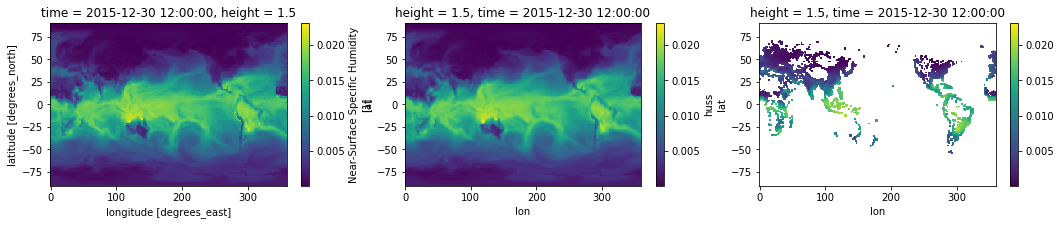

It takes elapsed_time 0.7122821807861328 to plot the layer
It takes elapsed_time 17.5721697807312 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/tas_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5119178295135498 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/tas_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0193586349487305 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/tas_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.5036418437957764 to load the data
*********Start to merge*********
It takes elapsed_time 5.461660385131836 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027662038803100586 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.078805685043335 to regrid the lay

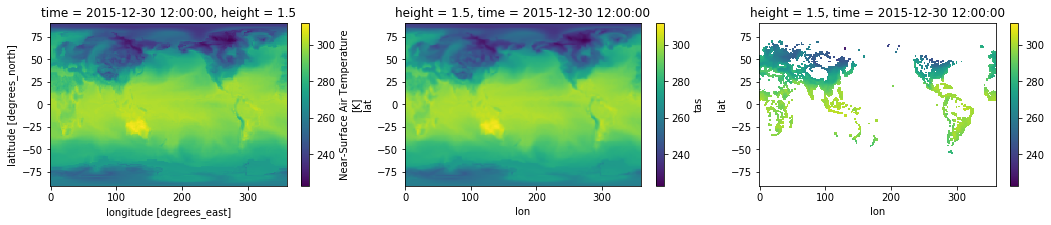

It takes elapsed_time 0.6960020065307617 to plot the layer
It takes elapsed_time 17.420042753219604 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/uas_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5412025451660156 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/uas_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0861530303955078 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/uas_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.568312644958496 to load the data
*********Start to merge*********
It takes elapsed_time 5.40522027015686 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.0676584243774414 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.052625179290771 to regrid the layer
*

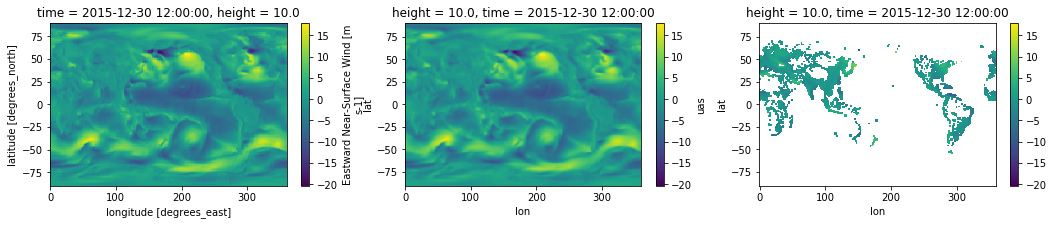

It takes elapsed_time 0.7421338558197021 to plot the layer
It takes elapsed_time 17.48484230041504 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/vas_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5317633152008057 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/vas_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0796067714691162 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/vas_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.5777196884155273 to load the data
*********Start to merge*********
It takes elapsed_time 5.414813995361328 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.027916669845581055 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.038982629776001 to regrid the laye

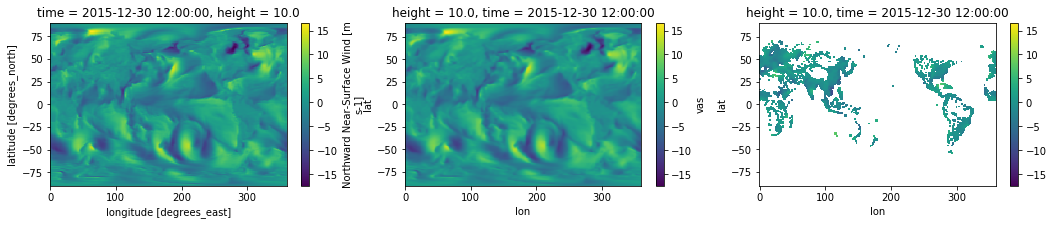

It takes elapsed_time 0.7355165481567383 to plot the layer
It takes elapsed_time 17.44649863243103 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/pr_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5313613414764404 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/pr_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0385007858276367 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/pr_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.5311229228973389 to load the data
*********Start to merge*********
It takes elapsed_time 5.45347261428833 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.06028103828430176 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.078574895858765 to regrid the layer
****

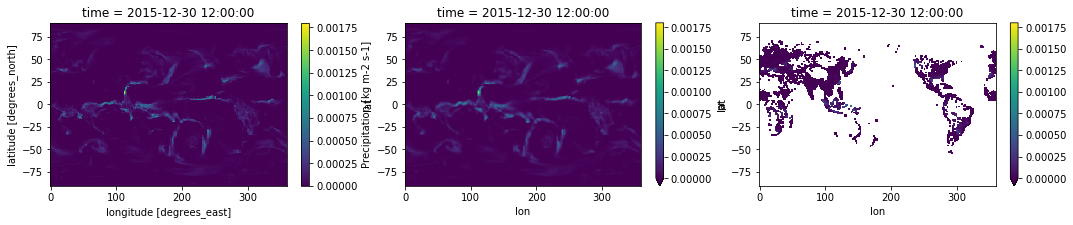

It takes elapsed_time 0.7009308338165283 to plot the layer
It takes elapsed_time 17.4731342792511 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/prsn_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.632218599319458 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/prsn_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.14566969871521 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/prsn_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.6274020671844482 to load the data
*********Start to merge*********
It takes elapsed_time 5.457432270050049 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.04199028015136719 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.079386472702026 to regrid the layer
*

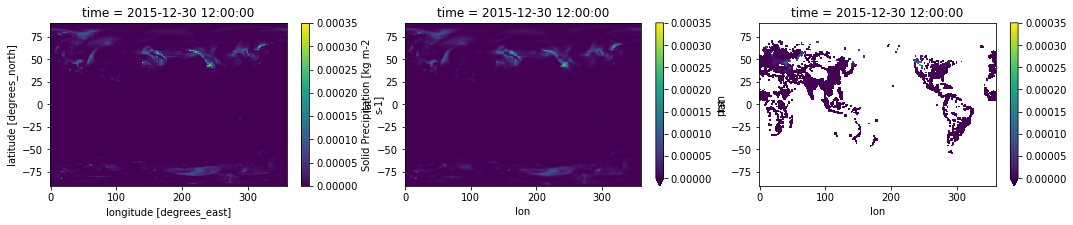

It takes elapsed_time 0.7364537715911865 to plot the layer
It takes elapsed_time 17.594441175460815 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlds_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5258874893188477 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlds_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.1644001007080078 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlds_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.7581803798675537 to load the data
*********Start to merge*********
It takes elapsed_time 5.442591905593872 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028180599212646484 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.079386472702026 to regrid t

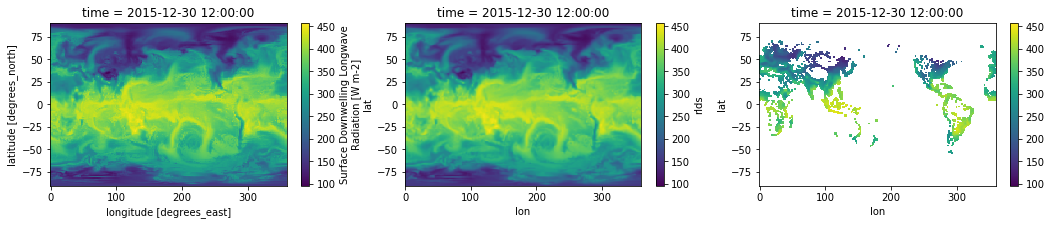

It takes elapsed_time 0.7371010780334473 to plot the layer
It takes elapsed_time 17.695703268051147 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlus_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5557866096496582 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlus_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0823702812194824 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlus_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.6294476985931396 to load the data
*********Start to merge*********
It takes elapsed_time 5.488462209701538 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028227806091308594 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.080708742141724 to regrid t

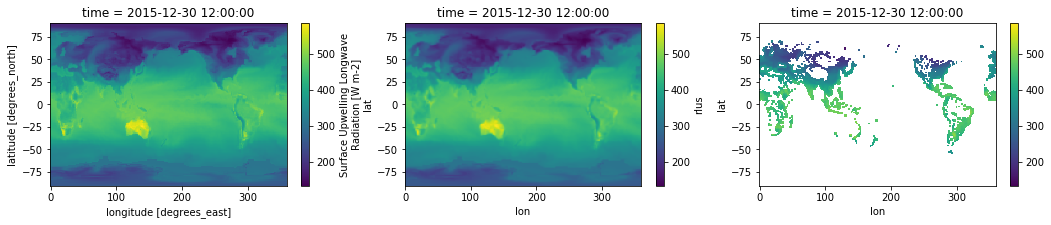

It takes elapsed_time 0.6945123672485352 to plot the layer
It takes elapsed_time 17.571758031845093 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsds_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5918400287628174 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsds_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.1424245834350586 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsds_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.649235486984253 to load the data
*********Start to merge*********
It takes elapsed_time 5.456104755401611 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027826786041259766 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.05017638206482 to regrid the

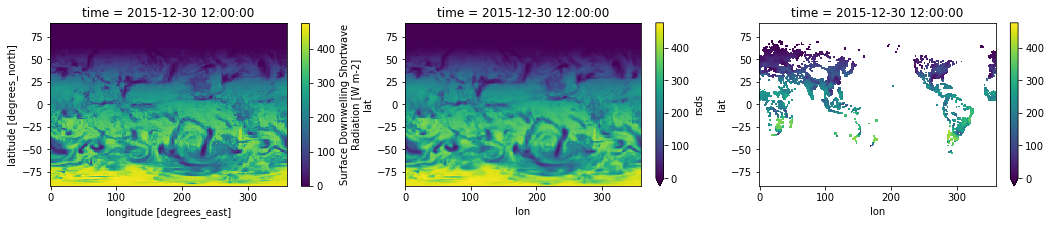

It takes elapsed_time 0.699232816696167 to plot the layer
It takes elapsed_time 17.53580331802368 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsus_day_HadGEM2-ES_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.6681952476501465 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsus_day_HadGEM2-ES_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.3007707595825195 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsus_day_HadGEM2-ES_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.8771467208862305 to load the data
*********Start to merge*********
It takes elapsed_time 5.450347185134888 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.06446361541748047 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.088980674743652 to regrid the 

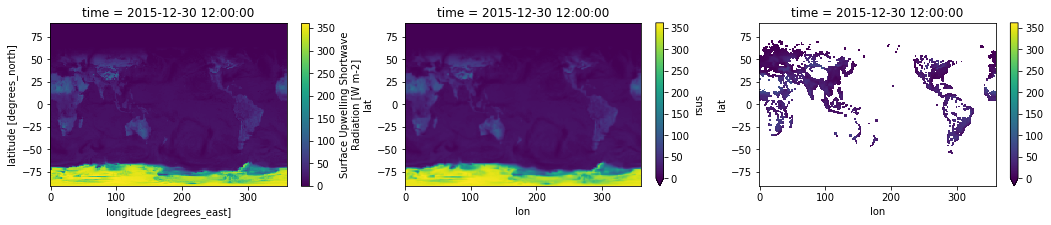

It takes elapsed_time 0.7145836353302002 to plot the layer
It takes elapsed_time 17.846163511276245 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2005, 2016, 5)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.412098169326782 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

251.42828392982483


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/huss_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.4578566551208496 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/huss_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 0.9842240810394287 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/huss_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.4727935791015625 to load the data
*********Start to merge*********
It takes elapsed_time 5.378338813781738 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.05905270576477051 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.054370880126953 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6437461376190186 to mask the layer
*********Start to plot the layer*********

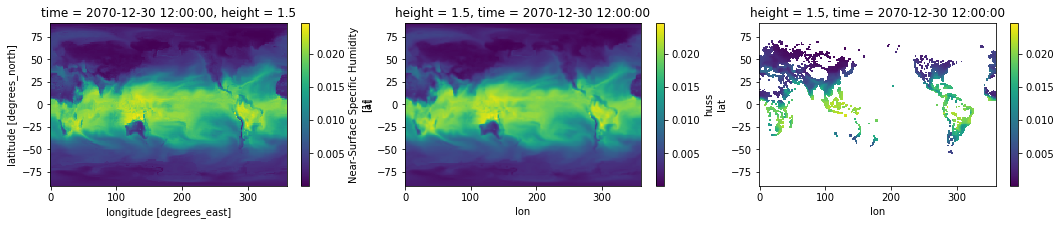

It takes elapsed_time 0.6903703212738037 to plot the layer
It takes elapsed_time 17.30013632774353 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/tas_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5309526920318604 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/tas_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.014763355255127 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/tas_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.5296027660369873 to load the data
*********Start to merge*********
It takes elapsed_time 5.380728244781494 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027936458587646484 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.040848970413208 to regrid the lay

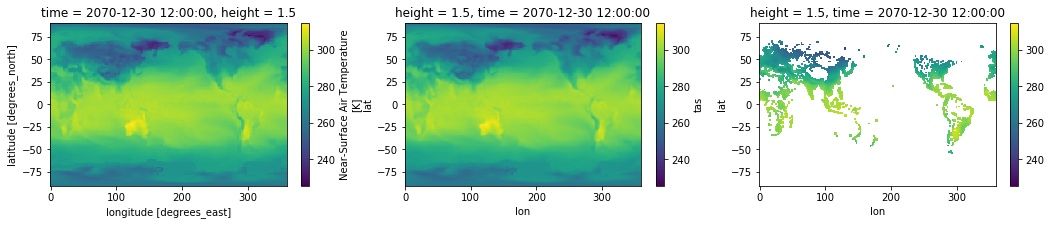

It takes elapsed_time 0.6820173263549805 to plot the layer
It takes elapsed_time 17.304771900177002 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/uas_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.48576974868774414 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/uas_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 0.9863579273223877 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/uas_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.5243260860443115 to load the data
*********Start to merge*********
It takes elapsed_time 5.333701133728027 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.05282425880432129 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.031177997589111 to regrid the lay

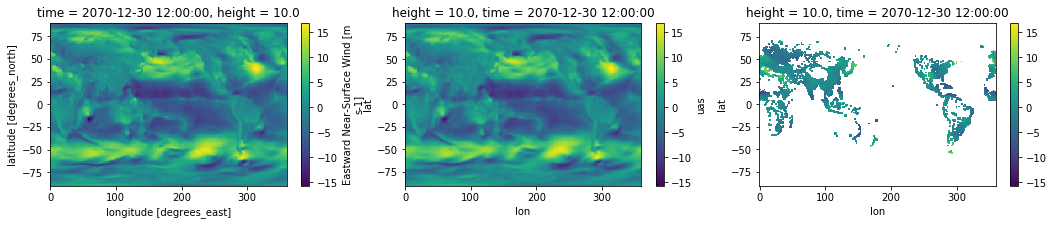

It takes elapsed_time 0.7212631702423096 to plot the layer
It takes elapsed_time 17.3082754611969 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/vas_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5200223922729492 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/vas_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.0266599655151367 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/vas_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.4900543689727783 to load the data
*********Start to merge*********
It takes elapsed_time 5.3345160484313965 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.027456283569335938 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.036924362182617 to regrid the laye

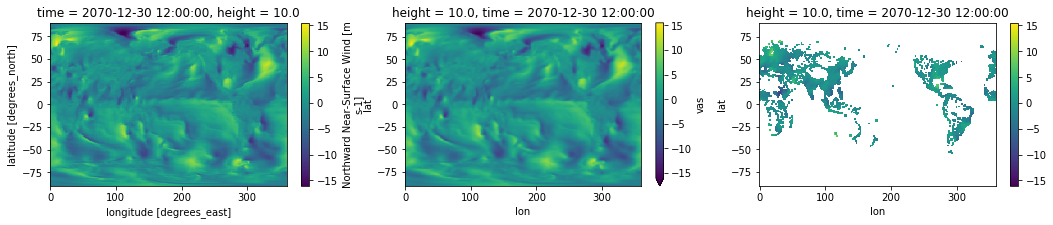

It takes elapsed_time 0.7290794849395752 to plot the layer
It takes elapsed_time 17.263960123062134 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/pr_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5002427101135254 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/pr_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.0237886905670166 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/pr_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.466966152191162 to load the data
*********Start to merge*********
It takes elapsed_time 5.3866658210754395 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.04814434051513672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.057085990905762 to regrid the layer
**

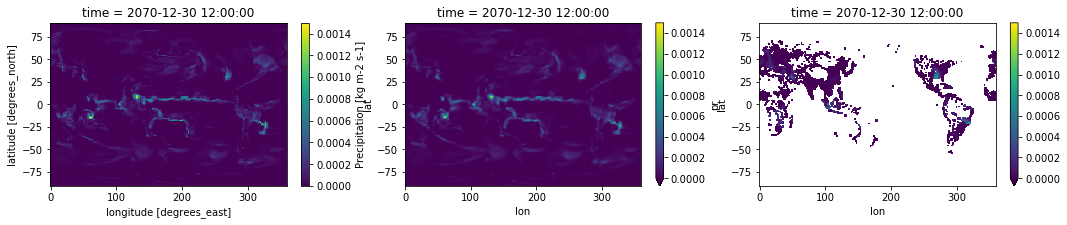

It takes elapsed_time 0.6916396617889404 to plot the layer
It takes elapsed_time 17.293596744537354 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/prsn_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5423665046691895 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/prsn_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.066765546798706 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/prsn_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.6628820896148682 to load the data
*********Start to merge*********
It takes elapsed_time 5.461477518081665 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028266191482543945 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.085474491119385 to regrid the la

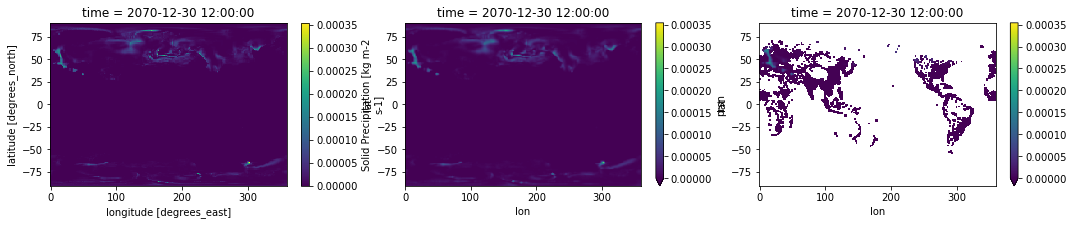

It takes elapsed_time 0.694744348526001 to plot the layer
It takes elapsed_time 17.585476398468018 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlds_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5783107280731201 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlds_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.151212215423584 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlds_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.697681188583374 to load the data
*********Start to merge*********
It takes elapsed_time 5.482341289520264 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08583664894104004 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.073060512542725 to regrid the l

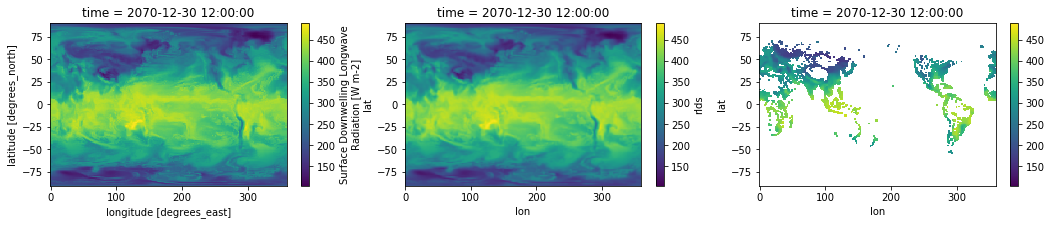

It takes elapsed_time 0.7353742122650146 to plot the layer
It takes elapsed_time 17.722947597503662 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlus_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.615915060043335 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlus_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.196216106414795 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rlus_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.8836205005645752 to load the data
*********Start to merge*********
It takes elapsed_time 5.491360664367676 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028157472610473633 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.072234630584717 to regrid the

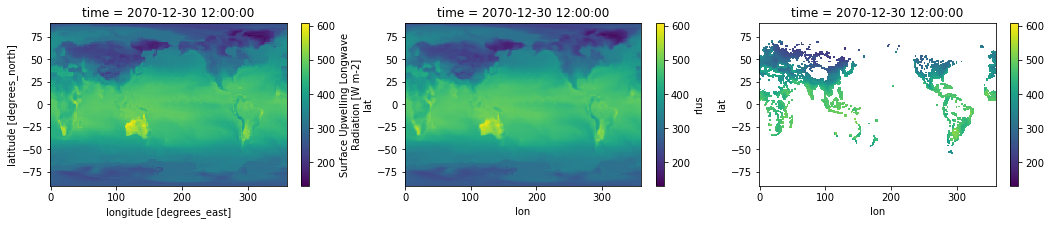

It takes elapsed_time 0.6996383666992188 to plot the layer
It takes elapsed_time 17.825228214263916 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsds_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5417344570159912 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsds_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.088926076889038 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsds_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.6266450881958008 to load the data
*********Start to merge*********
It takes elapsed_time 5.492435455322266 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.06398391723632812 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.072560548782349 to regrid the

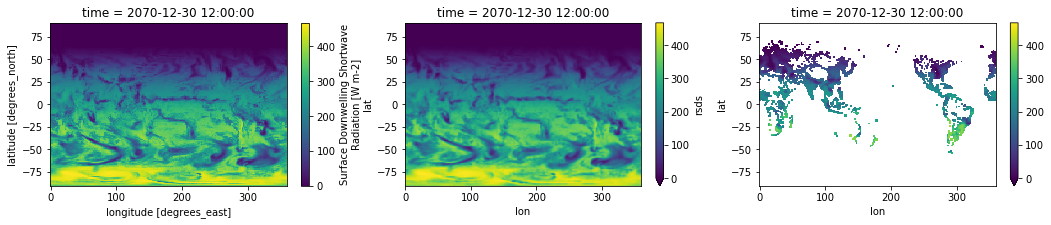

It takes elapsed_time 0.6999528408050537 to plot the layer
It takes elapsed_time 17.60886287689209 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsus_day_HadGEM2-ES_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.6009907722473145 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsus_day_HadGEM2-ES_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.227337121963501 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-ES/rsus_day_HadGEM2-ES_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.814948558807373 to load the data
*********Start to merge*********
It takes elapsed_time 5.414660215377808 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.052680015563964844 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.071792125701904 to regrid the 

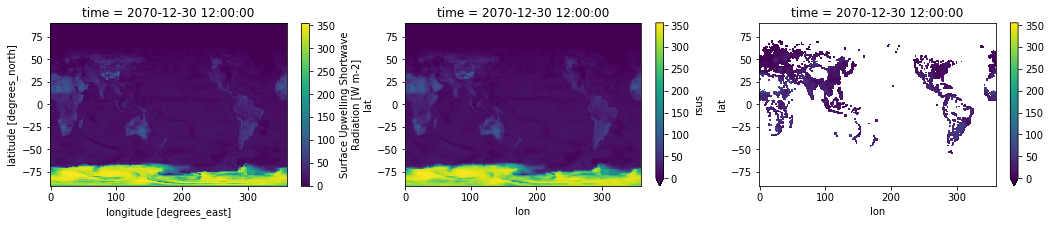

It takes elapsed_time 0.7067556381225586 to plot the layer
It takes elapsed_time 17.70577573776245 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2060, 2071, 5)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 27.85330820083618 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

248.02658700942993
